Vamos a usar el conjunto de datos del Titanic de la biblioteca seaborn para estos ejercicios.

Como ya vimos en clases anteriores, este conjunto de datos contiene información sobre los pasajeros del Titanic, incluyendo si sobrevivieron, su edad, género, clase, y más.

# Ejercicio 1

Describe las columnas y tipos de datos de c/u. Provea información de estadística descriptiva para cada una de esas columnas.



In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos del Titanic
titanic = sns.load_dataset('titanic')

In [50]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Ejercicio 2

Filtra el conjunto de datos para los pasajeros en la clase 'First' y grafica la distribución de sus edades. Verificar la existencia de datos faltantes y removerlos en el caso de que existan. Crea dos gráficos en una sola figura, un histograma y un gráfico de cajas. ¿Qué sugiere la figura?

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [21]:
# Verificar la existencia de datos faltantes
print(titanic.isnull().sum())
# Se verifica la existencia de datos faltantes en las columnas
# age, deck y embark_town

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [22]:
# Remove los datos faltantes
titanic_na = titanic.dropna()

In [23]:
print(titanic_na.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [24]:
titanic_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


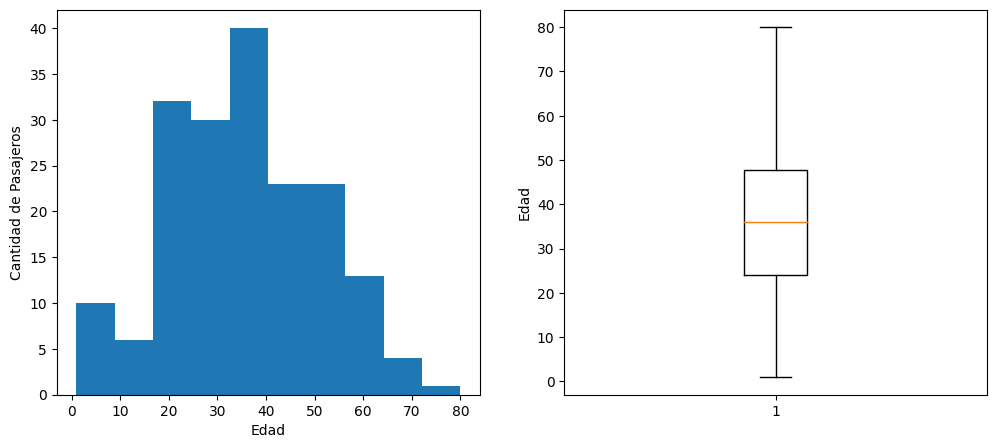

In [30]:
# Crea dos gráficos en una sola figura
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Un histograma
ax[0].hist(titanic_na["age"])
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Cantidad de Pasajeros")

# Un gráfico de cajas
ax[1].boxplot(titanic_na["age"])
ax[1].set_ylabel("Edad")

plt.show()

In [31]:
titanic_na["age"].describe()

count    182.000000
mean      35.623187
std       15.671615
min        0.920000
25%       24.000000
50%       36.000000
75%       47.750000
max       80.000000
Name: age, dtype: float64

 Los gráficos sugieren lo siguiente:
 - La mayoría de las edades se encuentran entre los 24 y 48 años, con una mediana en 36 años. Esto sugiere que la distribución de edades está ligeramente sesgada hacia los adultos jóvenes.
 - Las edades varían de 0.92 a 80 años, lo que sugiere una amplia variedad de edades en el conjunto de datos.

# Ejercicio 3

Agrupa a los pasajeros por clase y luego compara su distribución por edad usando gráficos de boxplot. ¿Qué sugiere el gráfico?

<Axes: title={'center': 'age'}, xlabel='class'>

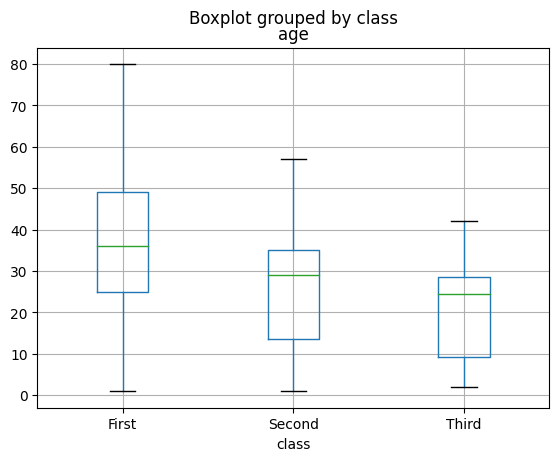

In [35]:
titanic_na.boxplot(column="age", by="class", grid=True)

Lox gráficos de boxplot sugieren que la edad media de los pasajeros es mayor a medida que aumenta la clase (de tercera a primera).
El rango de las edades de los pasajeros de primera clase es el más amplio entre las tres clases.


# Ejercicio 4

Explora la correlación entre la edad y el precio (Fare) abonado por el pasaje. ¿Qué sugiere el gráfico?

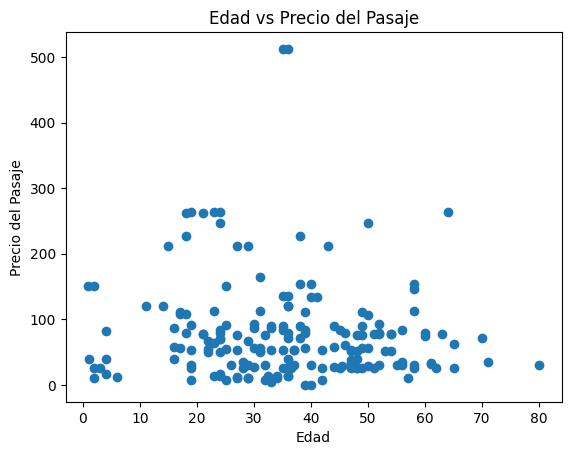

In [36]:
plt.scatter(x=titanic_na["age"], y=titanic_na["fare"])
plt.title("Edad vs Precio del Pasaje")
plt.xlabel("Edad")
plt.ylabel("Precio del Pasaje")

plt.show()

No hay un patrón discernible en la distribución de los puntos, la columna de edad no parece tener relación con el precio del pasaje.

Como se observa, existen dos pasajeros con billetes por arriba de 500 pounds. Vuelve a graficar el scatterplot, considerando solo aquellos billetes cuyos precios son menores a 400. ¿Qué sugiere el gráfico?

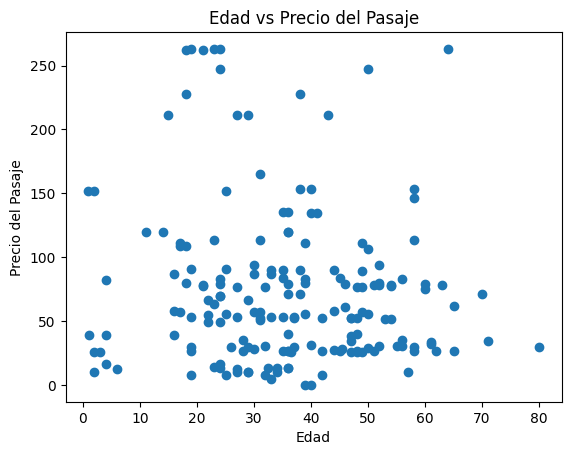

In [37]:
filtered_titanic = titanic_na[titanic_na["fare"] < 400]

plt.scatter(x=filtered_titanic["age"], y=filtered_titanic["fare"])
plt.title("Edad vs Precio del Pasaje")
plt.xlabel("Edad")
plt.ylabel("Precio del Pasaje")

plt.show()

Al remover los outliers, la distribución de los puntos es mucho más clara, pero aún no es posible discernir un patrón entre las columnas de edad y precio.

# Ejercicio 5

Explora la correlación entre la edad y el precio (Fare) abonado por el pasaje por sexo. Grafica dos scatterplots en una misma figura utilizando matplotlib. ¿Qué sugiere el gráfico?

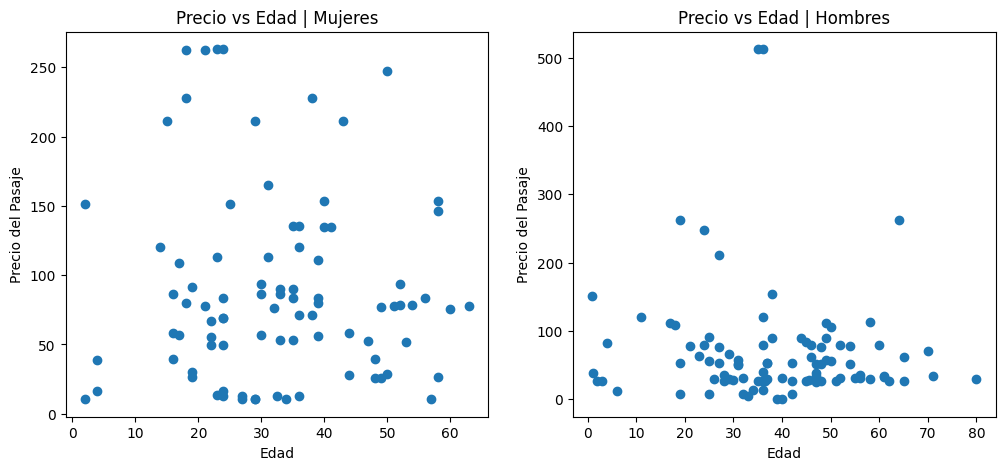

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

fare_females = titanic_na[titanic_na["sex"] == "female"]
fare_males = titanic_na[titanic_na["sex"] == "male"]

# Precio abonado por mujeres
ax[0].scatter(x=fare_females["age"], y=fare_females["fare"])
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Precio del Pasaje")
ax[0].set_title("Precio vs Edad | Mujeres")

# Precio abonado por hombres
ax[1].scatter(x=fare_males["age"], y=fare_males["fare"])
ax[1].set_xlabel("Edad")
ax[1].set_ylabel("Precio del Pasaje")
ax[1].set_title("Precio vs Edad | Hombres")

plt.show()

Los gráficos sugieren que el precio abonado por las mujeres fue mayor en promedio que el abonado por los hombres.

Explora la distribución de precio (Fare) abonado por el pasaje por sexo usando boxplot de matplotlib. ¿Qué sugiere el gráfico?

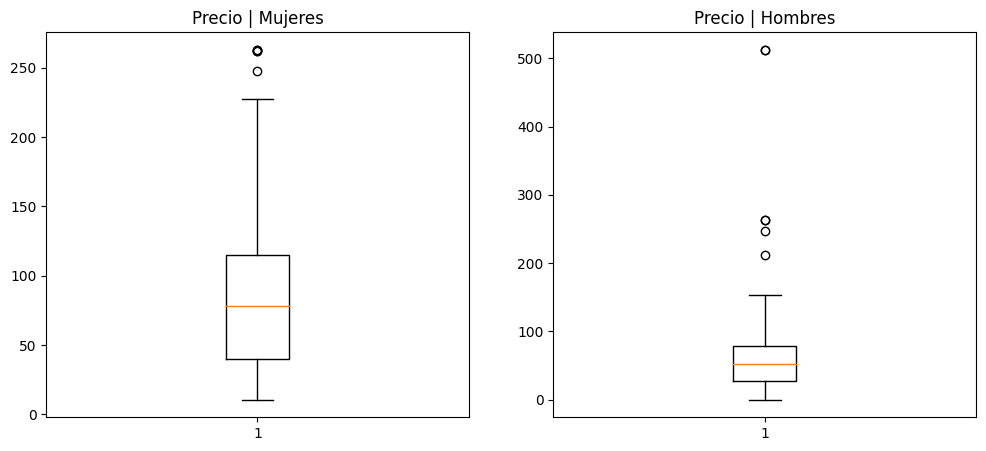

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Precio abonado por mujeres
ax[0].boxplot(x=fare_females["fare"])
ax[0].set_title("Precio | Mujeres")

# Precio abonado por hombres
ax[1].boxplot(x=fare_males["fare"])
ax[1].set_title("Precio | Hombres")

plt.show()

El rango de los precios abonados por los hombres es más amplio que el abonado por las mujeres.

Filtra los precios, considerando aquellos menores a 150. Vuelve a graficar los boxplots. ¿Qué sugieren los datos?

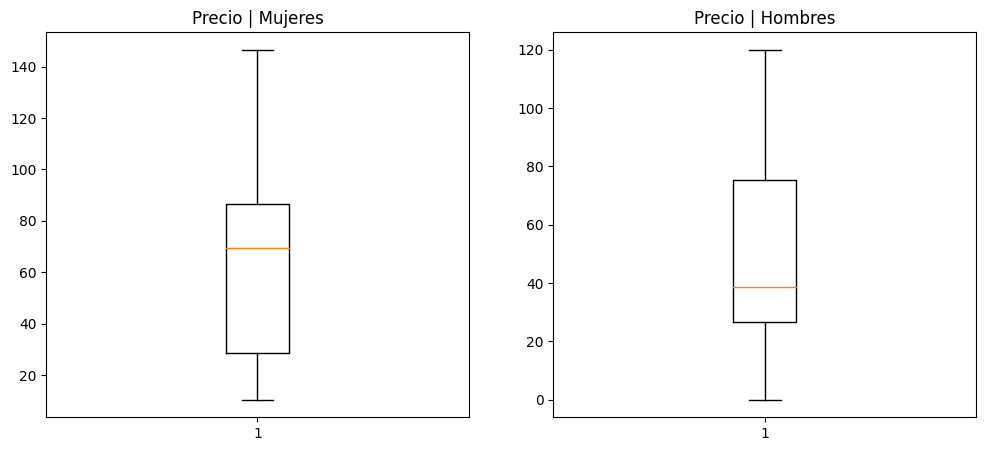

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

fare_females = fare_females[fare_females["fare"] < 150]
fare_males = fare_males[fare_males["fare"] < 150]

# Precio abonado por mujeres
ax[0].boxplot(x=fare_females["fare"])
ax[0].set_title("Precio | Mujeres")

# Precio abonado por hombres
ax[1].boxplot(x=fare_males["fare"])
ax[1].set_title("Precio | Hombres")

plt.show()

In [45]:
fare_females["fare"].describe()

count     73.000000
mean      63.970605
std       36.974339
min       10.462500
25%       28.712500
50%       69.300000
75%       86.500000
max      146.520800
Name: fare, dtype: float64

In [46]:
fare_males["fare"].describe()

count     86.000000
mean      49.030476
std       30.254378
min        0.000000
25%       26.550000
50%       38.750000
75%       75.296900
max      120.000000
Name: fare, dtype: float64

Filtrando los outliers y los monto mayores o iguales a 150, se aprecia que efectivamente los montos abonados en promedio por las mujeres era mayor a los abonados por los hombres.

# Ejercicio 6

Agrupa los datos por 'class' y calcula la tarifa promedio para cada clase. Crea un gráfico de barras de la tarifa promedio por clase. ¿Qué sugiere el gráfico?

<Axes: title={'center': 'Tarifa Promedio por Clase'}, xlabel='class'>

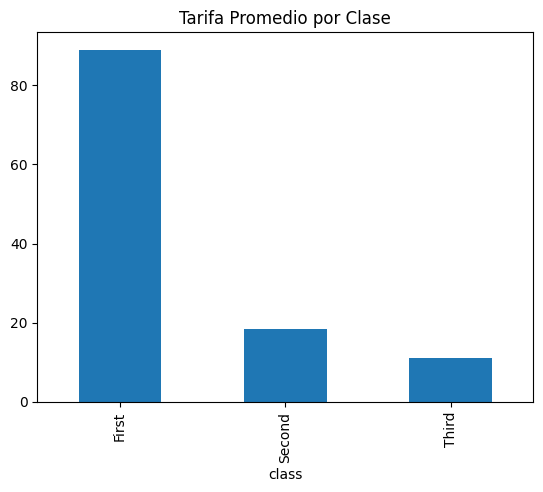

In [49]:
# Agrupa los datos por 'class' y calcula la tarifa promedio para cada clase
avg_fare_by_class = titanic_na.groupby("class")["fare"].mean()

avg_fare_by_class.plot.bar(title="Tarifa Promedio por Clase")

La tarifa promedio por clase es mucho mayor en la primera clase vs la segunda y tercera.
La tarifa promedio de la segunda y tercera clase son similaraes.

# Ejercicio 7

Filtra el conjunto de datos para los pasajeros que embarcaron en 'Southampton' y grafica la cantidad de sobrevivientes y no sobrevivientes usando un gráfico de barras. ¿Qué sugiere el gráfico?

<ipython-input-56-a018ae374db4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f_embark_town = titanic_na[titanic["embark_town"] == "Southampton"]


<Axes: title={'center': 'Sobrevivientes vs No Sobrevivientes | Southampton'}, xlabel='survived'>

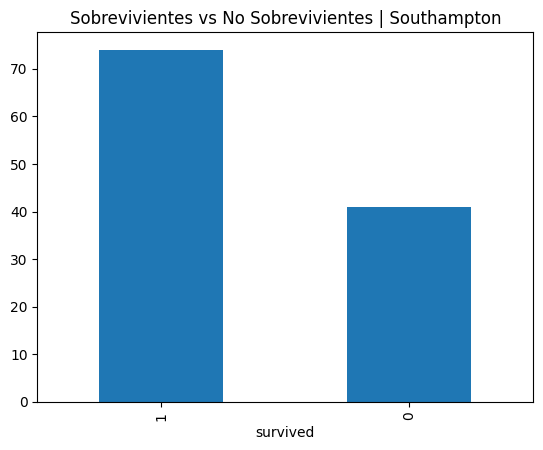

In [56]:
f_embark_town = titanic_na[titanic["embark_town"] == "Southampton"]

f_embark_town["survived"].value_counts().plot.bar(title="Sobrevivientes vs No Sobrevivientes | Southampton")

La mayoría de los pasajeros que embarcaron en Southampton sobrevivieron.


# Ejercicio 8

Filtra el conjunto de datos para incluir solo pasajeros masculinos, luego agrupa por 'embark_town' y calcula la tarifa promedio. Crea un gráfico de barras de los resultados.


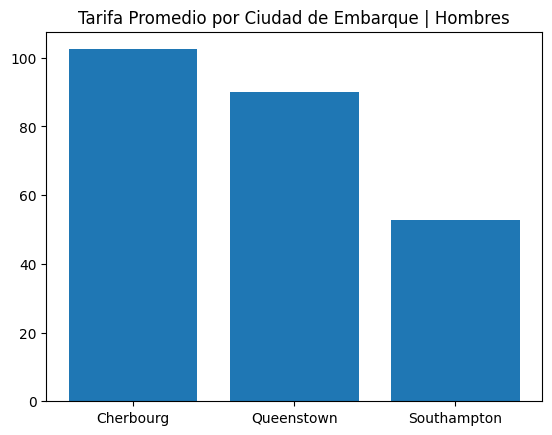

In [58]:
m_avg_fare_by_town = titanic_na[titanic_na["sex"] == "male"].groupby("embark_town")["fare"].mean()

plt.bar(x=m_avg_fare_by_town.index, height=m_avg_fare_by_town)
plt.title("Tarifa Promedio por Ciudad de Embarque | Hombres")
plt.show()

La tarifa promedio de los pasajeros masculinos que embarcaron en la ciudad de Cherbourg es mayor a la de los pasajeros que embarcaron en Queenstown y Southampton.

# Ejercicio 9
Filtra el conjunto de datos para incluir solo pasajeros femeninos, luego agrupa por 'embark_town' y calcula la tarifa promedio. Crea un gráfico de barras de los resultados.

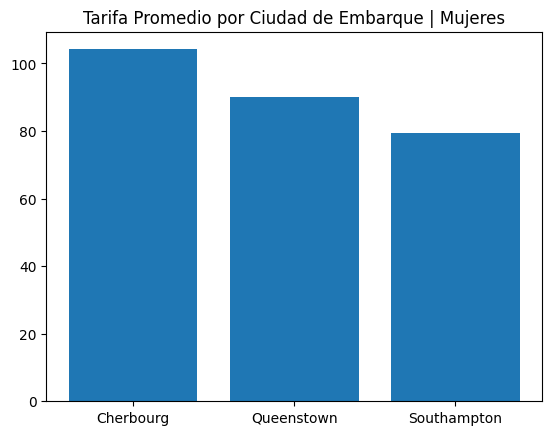

In [59]:
f_avg_fare_by_town = titanic_na[titanic_na["sex"] == "female"].groupby("embark_town")["fare"].mean()

plt.bar(x=f_avg_fare_by_town.index, height=f_avg_fare_by_town)
plt.title("Tarifa Promedio por Ciudad de Embarque | Mujeres")
plt.show()

La tarifa promedio de los pasajeros femeninos que embarcaron en la ciudad de Cherbourg es mayor a la de los pasajeros que embarcaron en Queenstown y Southampton. Sin embargo, la diferencia entre las diferentes ciudades es menor que la de los pasajeros masculinos.